In [1]:
import matplotlib.pyplot as plt
import sys
import torch
import numpy as np
import pathlib
path = pathlib.Path()
# Insert all modules a folder above
sys.path.insert(0, str(path.absolute().parent))
from ssd.config.defaults import cfg
from ssd.modeling.box_head.prior_box import PriorBox
from ssd.utils.box_utils import convert_locations_to_boxes

In [2]:
config_path = "../configs/resnet_waymo.yaml"
cfg.merge_from_file(config_path)

In [3]:
prior_box = PriorBox(cfg)

In [4]:
priors = prior_box()
print("Prior box shape:", priors.shape)
print("First prior example:", priors[5])
locations = torch.zeros_like(priors)[None]
priors_as_location = convert_locations_to_boxes(locations, priors,cfg.MODEL.CENTER_VARIANCE, cfg.MODEL.SIZE_VARIANCE)[0]

Prior box shape: torch.Size([7232, 4])
First prior example: tensor([0.0375, 0.0167, 0.1326, 0.1768])


In [5]:
def plot_bbox(box):
    cx, cy, w, h = box
    x1, y1 = cx + w/2, cy + h/2
    x0, y0 = cx - w/2, cy - h/2
    plt.plot(
        [x0, x0, x1, x1, x0],
        [y0, y1, y1, y0, y0]
    )

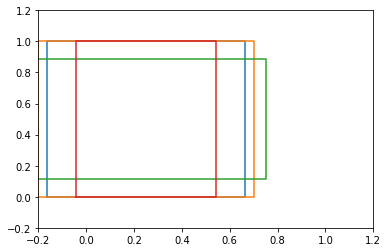

In [6]:
prior_idx = 7228
#plt.clf()
plt.ylim([-0.2, 1.2])
plt.xlim([-0.2, 1.2])
# Visualizing all would take too much
priors_as_location = [x for x in priors_as_location]
#np.random.shuffle(priors_as_location)
for prior in priors_as_location[prior_idx-4:prior_idx]:
    plot_bbox(prior)

In [7]:
print(prior)

tensor([0.7500, 1.0000, 0.2003, 0.8011])
